In [ ]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn                        
import matplotlib.pyplot as plt
import random
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd



In [2]:
# root : 다운받은 root 디렉토리 설절
# train : 트레이닝 데이터를 받을건지, 아니면 Test데이터셋을 다운받음
# transform : 지금은 이미지를 텐서로만 변환줬음, 나중에는 이미지의 좌우상하변화이나 흑백화가 가능하게끔 설정할 수 있음. 
cifar10_train = datasets.CIFAR10(root='cifar10_data',
                                 train=True,
                                 download=True,
                                 transform=transforms.Compose([transforms.ToTensor()]))
cifar10_test = datasets.CIFAR10(root='cifar10_data',
                                 train=False,
                                 download=True,
                                 transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
print(cifar10_train)
print(cifar10_test)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: cifar10_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [4]:
# 첫 이미지의 각각의 점의 색상 정보
cifar10_train.data[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
# 참고 : train과 test는 텐서형태이지만, 그안의 data는 텐서형태가 아님.
# 현재 이미지가 50000개 있음. 이미지 크기는 32*32, 색상은 3이므로 RGB컬러
cifar10_train.data.shape

(50000, 32, 32, 3)

In [6]:
# targets : 사진의 분류 정보(6번은 개구리, 9번은 트럭)
cifar10_train.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [7]:
# 커널 충돌 방지용 설정 : 라이브러리 충돌 시 커널 오류가 나는 경우가 있어, 아래 설정으로 방지함.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# 이미지 배열 그리기 함수 정의
def plot(x,y):
    plt.figure(figsize=(6,4))    # 전체 이미지의 크기 (너비, 높이)
    for i in range(len(x)):      # len(x) : 이미지 전체 갯수
        plt.subplot(3,4,i+1)     # 3행 4열의 서브플롯 중 i+1번째 위치에 그림을 그림
        plt.title(y[i])          # 해당 이미지의 레이블(y[i])을 제목으로 표시
        img=np.array(x[i].reshape(32,32,3)) # 이미지 데이터를 (32,32,3) 형태로 변환 (RGB 이미지)
        plt.imshow(img, cmap='gray') # 이미지 출력 (cmap='gray'는 RGB 이미지에는 필요 없음)
        plt.axis('off')           # 축 제거
        plt.tight_layout()           # subplot 간격 조정
    plt.show()

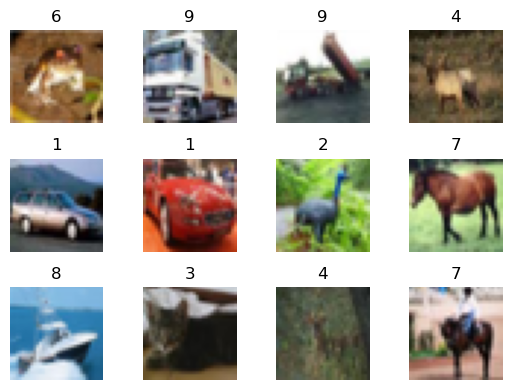

<class 'numpy.ndarray'>
<class 'list'>


In [8]:
plot(cifar10_train.data[:12], cifar10_train.targets[:12])
print(type(cifar10_train.data))   # 배열형태 데이터
print(type(cifar10_train.targets))       # 리스트형태 데이터

In [9]:
# 첫 번째 이미지 확인
cifar10_train.data[0]

# [중요 설명]
# CIFAR-10의 기본 이미지 데이터는 (row, col, channel) 구조 → (32, 32, 3)
# PyTorch는 (channel, row, col) 구조를 요구하므로 permute()로 순서 변경
# 또한, 학습을 위해 numpy → torch.Tensor로 변환 필요

# 이미지 데이터 변환: FloatTensor로 변환 후 채널 차원 앞으로 이동
cifar10_train.data1 = torch.FloatTensor(cifar10_train.data).permute(0, 3, 1, 2)

# 레이블 데이터 변환: 정수형 텐서로 변환 (분류용)
cifar10_train.targets1 = torch.LongTensor(cifar10_train.targets)

# 변환된 첫 번째 이미지 확인
cifar10_train.data1[0]

# 데이터 차원 확인
print(cifar10_train.data1.size())      # → torch.Size([N, 3, 32, 32])
print(cifar10_train.targets1.size())   # → torch.Size([N])

torch.Size([50000, 3, 32, 32])
torch.Size([50000])


In [10]:
# 입력 이미지 정규화 (0~255 → 0~1 범위로 스케일 조정)
x1 = cifar10_train.data1.float() / 255

# 타겟 레이블
y = cifar10_train.targets1

# 정규화된 첫 번째 이미지 확인
print(x1[0])

# 이미지를 1차원 벡터로 변환 (batch, 3072)
# 3*32*32 = 3072 → fully-connected layer 입력으로 사용할 수 있게 reshape
x = x1.view(x1.size(0), -1)

# 벡터 크기 확인
print(x.size())   # → torch.Size([N, 3072])

# 입력 크기: 3채널 이미지(32x32)를 flatten한 결과 (3072)
input_size = x.size(-1)

# 출력 크기: 클래스 개수 (0~9 → 10개 클래스)
output_size = int(max(y)) + 1

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [11]:
# ────────────────────────────────────────────────────────
# [1] 테스트 데이터 전처리
# ────────────────────────────────────────────────────────

# numpy 배열을 PyTorch Tensor로 변환
# CIFAR-10 원본 데이터는 (N, H, W, C)이므로 → (N, C, H, W)로 permute 필요
cifar10_test.data = torch.FloatTensor(cifar10_test.data).permute(0, 3, 1, 2)

# 레이블도 LongTensor로 변환 (분류용 정수형 레이블)
cifar10_test.targets = torch.LongTensor(cifar10_test.targets)

In [12]:
# ────────────────────────────────────────────────────────
# [2] 학습/검증/테스트 분할 설정
# ────────────────────────────────────────────────────────

ratio = [0.8, 0.2]  # 학습:검증 비율

# 전체 데이터 개수를 기준으로 개수 계산
train_cnt = int(x.size(0) * ratio[0])   # 학습 데이터 수 (ex: 50000 * 0.8)
valid_cnt = int(x.size(0) * ratio[1])   # 검증 데이터 수 (ex: 50000 * 0.2)
test_cnt = len(cifar10_test.data)      # 테스트 데이터 수

print(train_cnt, valid_cnt, test_cnt)

cnts = [train_cnt, valid_cnt]  # split용 개수 리스트

# ────────────────────────────────────────────────────────
# [3] 학습/검증 데이터 무작위 분할
# ────────────────────────────────────────────────────────

# 인덱스 무작위 셔플 (0~49999 범위의 인덱스 랜덤 섞기)
indices = torch.randperm(x.size(0))
print(indices)

# x, y 데이터를 무작위로 섞은 순서로 재배열
x1 = torch.index_select(x, dim=0, index=indices) 
y1 = torch.index_select(y, dim=0, index=indices) 

# 학습/검증 세트 분리
x2 = list(x1.split(cnts, dim=0))  # ex: [train_x, valid_x]
y2 = list(y1.split(cnts, dim=0))  # ex: [train_y, valid_y]

# ────────────────────────────────────────────────────────
# [4] 테스트 데이터 추가
# ────────────────────────────────────────────────────────

# 테스트 이미지 정규화 및 flatten (N, C, H, W) → (N, 3072)
x2 += [(cifar10_test.data.float() / 255).view(test_cnt, -1)]

# 테스트 레이블 추가
y2 += [cifar10_test.targets]

# ────────────────────────────────────────────────────────
# [5] 전체 세트 확인 (train, valid, test)
# ────────────────────────────────────────────────────────

# zip을 통해 x, y 짝지어 사이즈 출력
for x_i, y_i in zip(x2, y2):
    print(x_i.size(), y_i.size())

# 참고:
# x2[0], y2[0] → 학습 세트
# x2[1], y2[1] → 검증 세트
# x2[2], y2[2] → 테스트 세트

40000 10000 10000
tensor([40692, 31736, 28832,  ...,  5624, 23947, 47092])
torch.Size([40000, 3072]) torch.Size([40000])
torch.Size([10000, 3072]) torch.Size([10000])
torch.Size([10000, 3072]) torch.Size([10000])


In [13]:
# ────────────────────────────────────────────────────────
# 다층 퍼셉트론 (MLP) 모델 정의 – nn.Sequential 방식
# ────────────────────────────────────────────────────────

model = nn.Sequential(
    # 입력층: input_size(3072) → 1000차원
    nn.Linear(input_size, 500),
    nn.LeakyReLU(),  # LeakyReLU 활성화 함수 (음수 입력도 약간 통과시킴)

    # 배치 정규화
    nn.BatchNorm1d(500),

    # 은닉층: 500 → 400
    nn.Linear(500, 400),
    nn.LeakyReLU(),

    # 배치 정규화
    nn.BatchNorm1d(400),

    # 은닉층: 400 → 300
    nn.Linear(400, 300),
    nn.LeakyReLU(),

    # 배치 정규화
    nn.BatchNorm1d(300),

    # 은닉층: 300 → 200
    nn.Linear(300, 200),
    nn.LeakyReLU(),

    # 배치 정규화
    nn.BatchNorm1d(200),

    # 은닉층: 200 → 100
    nn.Linear(200, 100),
    nn.LeakyReLU(),

    # 배치 정규화
    nn.BatchNorm1d(100),

    # 출력층: 50 → output_size(10)
    nn.Linear(100, output_size)
)

# 모델 구조 출력 (모듈 목록 형태로 확인됨)
model

Sequential(
  (0): Linear(in_features=3072, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=500, out_features=400, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=400, out_features=300, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Linear(in_features=300, out_features=200, bias=True)
  (10): LeakyReLU(negative_slope=0.01)
  (11): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Linear(in_features=200, out_features=100, bias=True)
  (13): LeakyReLU(negative_slope=0.01)
  (14): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Linear(in_features=100, out_features=10, bia

In [14]:
# ────────────────────────────────────────────────────────
# [1] 손실 함수와 옵티마이저 정의
# ────────────────────────────────────────────────────────

# CrossEntropyLoss는 내부적으로 softmax + log + NLLLoss 포함 → 출력층에 softmax 생략 가능
crit = nn.CrossEntropyLoss()

# Adam 옵티마이저: 모델의 학습 가능한 모든 파라미터 대상
optimizer = optim.Adam(model.parameters())
# print(list(model.parameters()))

In [15]:
# ────────────────────────────────────────────────────────
# [2] 학습 설정
# ────────────────────────────────────────────────────────

epochs = 500            # 총 학습 epoch 수
batch_size = 256         # 배치 크기
from copy import deepcopy

lowest_loss = np.inf     # 지금까지 측정한 최소 validation 손실 값
lowest_epoch = np.inf    # 최소 손실을 기록한 epoch
early_stop = 20


In [16]:
train_history = []       # epoch별 학습 손실 기록용
valid_history = []       # epoch별 검증 손실 기록용

# ────────────────────────────────────────────────────────
# [3] 학습 루프 시작
# ────────────────────────────────────────────────────────

for epoch in range(epochs):
    # ───── 학습 단계 ─────
    # 학습 데이터를 배치 단위로 분할
    x_ = x2[0].split(batch_size, dim=0)
    y_ = y2[0].split(batch_size, dim=0)

    train_loss = 0
    y_hat = []  # (선택사항) 예측값 저장용 리스트

    for x_i, y_i in zip(x_, y_):
        # forward: 예측값 계산
        y_hat_i = model(x_i)  # shape: (batch_size, num_classes)

        # 손실 계산 (CrossEntropyLoss는 정수형 라벨 사용)
        loss = crit(y_hat_i, y_i.view(-1))  # y_i: (batch_size,)

        # backward: 파라미터 업데이트
        optimizer.zero_grad()   # 기울기 초기화
        loss.backward()         # 역전파
        optimizer.step()        # 파라미터 갱신

        # 손실 누적
        train_loss += float(loss)

    # 평균 손실 계산
    train_loss = train_loss / len(x_)   # = epoch 평균 손실

    # ───── 검증 단계 ─────
    with torch.no_grad():  # 그래디언트 계산 없이 추론
        x_ = x2[1].split(batch_size, dim=0)
        y_ = y2[1].split(batch_size, dim=0)
        valid_loss = 0

        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = crit(y_hat_i, y_i.view(-1))  # 검증 손실 계산
            valid_loss += float(loss)

            y_hat += [y_hat_i]  # (선택) 전체 예측 결과 저장

        # 평균 검증 손실 계산
        valid_loss = valid_loss / len(x_)

    # 손실 기록 저장
    train_history += [train_loss]
    valid_history += [valid_loss]

    # ───── 진행 상황 출력 (10 에폭마다) ─────
    if epoch % 10 == 0:
        print(epoch, train_loss, valid_loss, lowest_loss)

    # ───── 조기 종료(early stopping) 체크 ─────
    if valid_loss <= lowest_loss:
        # 최소 손실 갱신 시: 모델 저장
        lowest_loss = valid_loss
        lowest_epoch = epoch
        best_model = deepcopy(model.state_dict())  # 모델 가중치 복사
    else:
        # early_stop 값이 설정된 경우: 조건 만족하면 학습 중단
        if early_stop > 0 and lowest_epoch + early_stop < epoch:
            print(f'lowest_epoch : {lowest_epoch} 이후 {early_stop} epoch 동안 손실 감소 없음')
            break

# 최종 결과 출력
print(f'epoch : {lowest_epoch}일 때, 손실함수가 {lowest_loss}로 최소값을 가짐')


0 1.73373530093272 1.597593405842781 inf
10 1.007785177534553 1.4936216741800308 1.4299961805343628
20 0.5808285275462327 2.032737398147583 1.4299961805343628
lowest_epoch : 5 이후 20 epoch 동안 손실 감소 없음
epoch : 5일 때, 손실함수가 1.4299961805343628로 최소값을 가짐


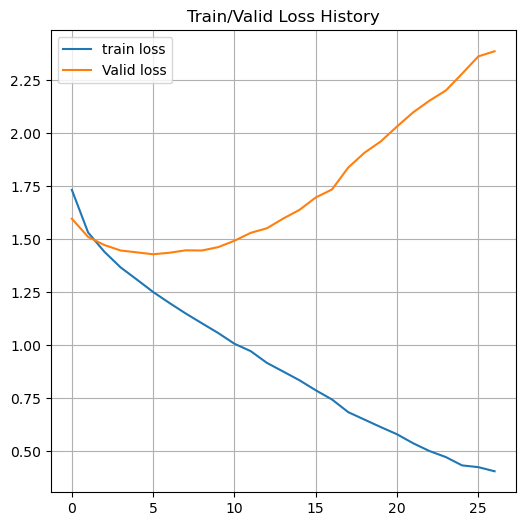

In [17]:
# ────────────────────────────────────────────────────────
# [1] 학습/검증 손실 시각화
# ────────────────────────────────────────────────────────

plot_from = 0
plt.figure(figsize=(6, 6))          # 전체 plot 크기 설정
plt.grid(True)
plt.title("Train/Valid Loss History")  # 제목 설정

# 학습 손실 그래프
plt.plot(range(plot_from, len(train_history)), train_history[plot_from:], label="train loss")

# 검증 손실 그래프
plt.plot(range(plot_from, len(valid_history)), valid_history[plot_from:], label="Valid loss")

plt.legend()
# plt.yscale('log')  # 로그 스케일이 필요하다면 활성화
plt.show()


In [18]:
# ────────────────────────────────────────────────────────
# [4] 테스트 손실 계산 및 전체 예측 결과 수집
# ────────────────────────────────────────────────────────

test_loss = 0
y_hat = []  # 예측 결과를 저장할 리스트

# 평가 시에는 no_grad()로 불필요한 gradient 계산 방지
with torch.no_grad():
    # 테스트 데이터 (x2[-1], y2[-1])를 배치 단위로 분할
    x_ = x2[-1].split(batch_size, dim=0)
    y_ = y2[-1].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        # 예측값 계산
        y_hat_i = model(x_i)

        # 손실 계산 (CrossEntropyLoss는 정수형 라벨 사용)
        loss = crit(y_hat_i, y_i.squeeze())

        # 배치별 손실을 누적
        test_loss += loss

        # 배치별 예측 결과 저장
        y_hat += [y_hat_i]

# 평균 테스트 손실 계산 (배치 개수로 나눔)
test_loss = test_loss / len(x_)

# 배치별로 저장한 예측 결과들을 하나의 텐서로 연결
y_hat = torch.cat(y_hat, dim=0)

# 결과 출력
print('🧪 Test Loss:', test_loss)

🧪 Test Loss: tensor(2.3675)


In [19]:
# ────────────────────────────────────────────────────────
# [2] 테스트 정확도 계산
# ────────────────────────────────────────────────────────

# 마지막 예측 결과 y_hat과 실제 정답 y2[-1] 비교
# 정답과 예측 라벨이 같은 경우의 개수 카운트
correct_cnt = (y2[-1].squeeze() == torch.argmax(y_hat, dim=-1)).sum()

# 총 샘플 수
total_count = float(y2[-1].size(0))

# 정확도 출력
print('✔️ Test Accuracy :', (correct_cnt / total_count).item())

✔️ Test Accuracy : 0.48350000381469727


In [20]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# 실제 라벨과 예측 라벨 추출
y_true = y2[-1].cpu().numpy().flatten()
y_pred = torch.argmax(y_hat, dim=1).cpu().numpy().flatten()

# 혼동 행렬 생성
cm = confusion_matrix(y_true, y_pred)

# pandas DataFrame으로 변환 (클래스 이름은 0~9로 설정)
cm_df = pd.DataFrame(cm, 
                     index=[f"True {i}" for i in range(10)],
                     columns=[f"Pred {i}" for i in range(10)])

# 혼동 행렬 출력
print("\n🎯 Confusion Matrix:")
print(cm_df)


🎯 Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  \
True 0     556      39      96      30      41      14      28      28   
True 1      79     583      27      22      10      31      14      22   
True 2      64      26     411     114     106      72      85      81   
True 3      33      27      87     346      67     184     122      58   
True 4      55      22     182      80     341      74      91     110   
True 5      22      15      61     234      71     394      83      78   
True 6      18      25      94     118     113      46     526      20   
True 7      58      23      53      73      69      70      35     553   
True 8     116      89      20      23      31      27      15      19   
True 9      66     185      19      37      22      29      12      47   

        Pred 8  Pred 9  
True 0     124      44  
True 1      70     142  
True 2      16      25  
True 3      30      46  
True 4      24      21  
True 5      18

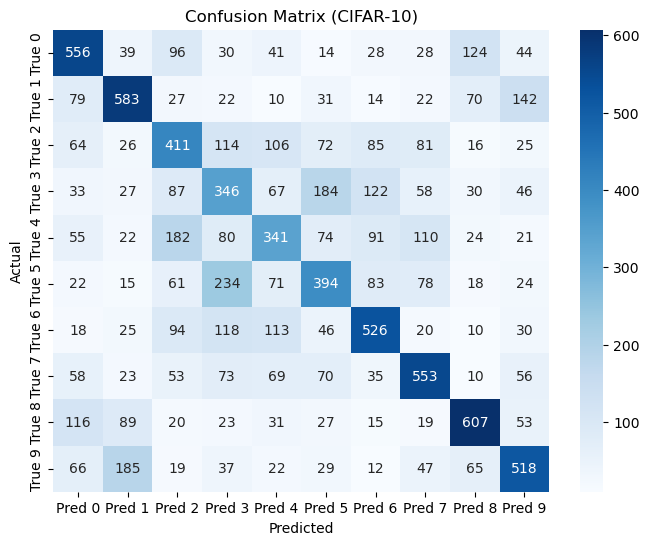

In [21]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (CIFAR-10)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [22]:
# 과적합을 막는 방법
# - 데이터의 양을 늘리기
# - 모델의 복잡도 줄이기
# - 가중치 규제(Regularizaion) 적용하기
# - 드롭아웃(Dropout)